# Graph Analysis
### Adjacency list
An **adjacency list** is a way to represent a graph. It is a list of nodes of the graph such that each node in the list contains its neghbors. Adjacency lists are specially useful for **sparse graphs** where the number of edges is much less than the maximum possible. 
 - In **undirected** graphs, for each edge $(u,v)$, both $u$ and $v$ appear in each other's lists.
 - In **directed** graphs, for each directed edge $u→v$, node $v$ appears in $u$'s list, but not necessarily vice versa.
 - In **weighted** graphs, each list element is a tuple $(neighbor,weight)$.
 
<hr>

**Reminder:** It is mentioned that we have already talked about **adjacency matrix**, which is another way to represents graphs.
<hr>

In the following, we define our own class for holding a graph, which uses an *adjacency list* defined by `defaultdict` in Python. Then, we create two graphs with this class. Finally, we provide a Python funcion that converts our graph into **NetworkX** graph and use it to display our graph.

<hr>

https://github.com/ostad-ai/Graph-Analysis
<br>Explanation in English :https://www.pinterest.com/HamedShahHosseini/graph-analysis/

In [1]:
# Import required modules
from collections import defaultdict
# Import for displaying the graph
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Define the class Graph, which holds the adjacency list
# It supports, undirected, directed, and weighted graphs
class Graph:
    def __init__(self, directed=False):
        self.graph = defaultdict(list) # adjacency list
        self.directed = directed # #undirected or directed
        
    def add_edge(self, u, v, weight=None):
        """Add an edge from u to v."""
        if weight is None:
            self.graph[u].append(v)
        else:
            self.graph[u].append((v, weight))
            
        # If undirected, add reverse edge
        if not self.directed:
            if weight is None:
                self.graph[v].append(u)
            else:
                self.graph[v].append((u, weight))
    
    def get_neighbors(self, v):
        """Get all neighbors of vertex v."""
        return self.graph.get(v, [])
    
    def __str__(self):
        """String representation of the graph."""
        return "\n".join(f"{v}: {neighbors}" for v, neighbors in self.graph.items())

In [3]:
# Example usage

# Undirected unweighted graph
g_undir = Graph(directed=False)
g_undir.add_edge('A', 'B')
g_undir.add_edge('B', 'C')
g_undir.add_edge('B', 'D')
g_undir.add_edge('D','C')
print("Undirected Graph:")
print(g_undir)
#-------------------------------
# Directed weighted graph
g_dir_weighted = Graph(directed=True)
g_dir_weighted.add_edge('A', 'B', 5)
g_dir_weighted.add_edge('A', 'C', 2)
g_dir_weighted.add_edge('B', 'C', 3)

print("\nDirected Weighted Graph:")
print( g_dir_weighted)

Undirected Graph:
A: ['B']
B: ['A', 'C', 'D']
C: ['B', 'D']
D: ['B', 'C']

Directed Weighted Graph:
A: [('B', 5), ('C', 2)]
B: [('C', 3)]


In [4]:
# Extra, a function to convert your graph to Networkx
def convert_to_networkx(your_graph, directed=False):
    """
    Convert your custom graph to NetworkX format.
    your_graph: dict in format {node: [neighbors]}
    """
    if directed:
        nx_graph = nx.DiGraph()
    else:
        nx_graph = nx.Graph()
    
    for u, neighbors in your_graph.items():
        for v in neighbors:
            if isinstance(v,tuple):
                nx_graph.add_edge(u, v[0],weight=v[1])
            else:
                nx_graph.add_edge(u, v)
    
    return nx_graph

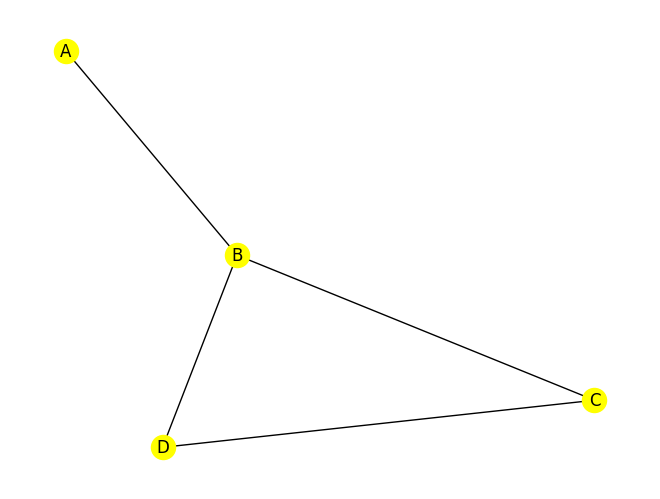

In [5]:
# Convert your graph to NetworkX style and display it
mygraph=g_undir.graph
nx_graph = convert_to_networkx(mygraph,directed=False)
pos=nx.spring_layout(nx_graph)
nx.draw(nx_graph, with_labels=True,node_color='yellow')
plt.show()